# Initial Prediction 

This does not yet include noise or signal  processing, only PCA dimension reduction to see the initial predictions and scoring


In [5]:

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime, time


In [6]:
#denoising

import pywt

def denoise_signal_simple(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    # univeral threshold
    uthresh = 10
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    # Reconstruct the signal using the thresholded coefficients
    return pywt.waverec(coeff, wavelet, mode='per')

In [7]:
# continuous_factory_process.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('data/continuous_factory_process.csv', delimiter=',')
df.dataframeName = 'continuous_factory_process.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 14088 rows and 116 columns


In [8]:
df

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,72.0,72.3,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.00,247,1246.09,72.0,72.3,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.00,247,1246.29,72.0,72.3,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.00,247,1247.59,72.0,72.3,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.00,247,1252.83,72.1,72.4,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,72.0,71.8,...,7.87,7.93,5.53,5.65,2.07,1.85,3.80,2.89,7.56,11.71
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,72.0,71.8,...,7.85,7.93,5.48,5.65,2.01,1.85,3.79,2.89,7.76,11.71
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,72.0,71.8,...,7.93,7.93,5.54,5.65,2.06,1.85,3.83,2.89,7.66,11.71
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,1048.06,252,1261.99,72.0,71.9,...,7.85,7.93,5.51,5.65,2.05,1.85,3.83,2.89,7.87,11.71


In [9]:
# deleting the first column

df1 = df.drop(columns = ['time_stamp'], axis = 1)

# checking the shape of the data after deleting a column
df1.shape

(14088, 115)

In [10]:
#filter the y variables (Output measurement actuals) for prediction 

df2=df1.filter(regex='Stage1', axis=1).filter(regex='Actual', axis=1)


In [12]:
#create list of columns names for x and y separation
ylist=df2.columns.to_list()


In [13]:
# separating the dependent and independent data
X=df1.drop(ylist, axis=1)
y = df2

# Denoising the Dataframe

In [29]:
# denoising the X Matrix

X_denoised=denoise_signal_simple(X)
X_denoised=pd.DataFrame(X_denoised)
X_denoised=X_denoised.round(decimals=2)
X_denoised

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,20.16,21.38,12.25,200.00,962.98,246.98,1241.27,71.92,71.99,48.31,...,0.27,0.22,0.95,0.96,1.55,1.60,0.61,1.08,2.73,8.81
1,20.16,21.38,12.25,200.00,962.98,246.98,1246.10,71.92,71.99,48.31,...,0.27,0.22,0.95,0.96,1.55,1.60,0.61,1.08,2.73,8.81
2,20.16,21.38,12.25,200.00,962.98,246.98,1246.30,71.92,72.00,48.43,...,0.27,0.22,0.95,0.96,1.55,1.60,0.61,1.08,2.73,8.81
3,20.16,21.38,12.25,200.00,962.98,246.98,1247.60,71.92,71.99,48.85,...,0.27,0.22,0.95,0.95,1.55,1.60,0.61,1.08,2.73,8.81
4,20.16,21.38,12.25,200.00,962.98,246.98,1252.84,72.02,72.10,48.84,...,0.27,0.21,0.95,0.95,1.56,1.60,0.61,1.08,2.73,8.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,18.50,19.48,13.83,200.97,1048.03,251.98,1263.77,71.92,71.50,73.73,...,3.22,3.55,3.76,3.09,2.73,2.49,2.00,3.37,6.62,11.48
14084,18.50,19.46,13.84,200.97,1048.03,251.98,1255.43,71.92,71.50,73.60,...,3.21,3.53,3.74,3.07,2.69,2.46,2.00,3.42,6.72,11.57
14085,18.50,19.47,13.84,200.98,1048.03,251.98,1257.53,71.92,71.50,73.87,...,3.25,3.55,3.77,3.10,2.72,2.49,2.01,3.41,6.68,11.52
14086,18.49,19.44,13.84,200.97,1048.03,251.98,1262.00,71.92,71.60,74.68,...,3.22,3.53,3.74,3.08,2.71,2.48,2.03,3.46,6.77,11.60


In [31]:
# denoising the Y Matrix
y_denoised=denoise_signal_simple(y)
y_denoised=pd.DataFrame(y_denoised)
y_denoised=y_denoised.round(decimals=1)
y_denoised

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,6.9,6.1,10.0,22.1,1.0,-0.2,1.3,6.3,17.9,19.0,8.9,4.1,1.3,3.8,14.7,15.5
1,6.7,5.6,-1.7,17.9,0.0,1.2,-0.3,4.6,17.2,18.1,7.8,4.0,3.3,1.1,0.1,1.9
2,6.7,5.6,-1.7,17.9,0.0,1.2,-0.3,4.6,17.2,18.1,7.8,4.0,3.3,1.1,0.1,1.9
3,6.7,5.6,-1.7,17.9,0.0,1.2,-0.3,4.6,17.2,18.1,7.8,4.0,3.3,1.1,0.1,1.9
4,5.3,5.8,3.2,12.2,32.5,0.1,6.3,-2.8,1.4,17.1,5.6,6.6,2.9,0.8,0.5,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,11.0,0.2,12.2,18.1,32.1,0.1,3.9,1.4,20.4,20.4,5.3,1.4,3.4,1.3,-1.2,2.1
14084,11.0,0.2,12.2,18.1,32.1,0.1,3.9,1.4,20.4,20.4,5.3,1.4,3.4,1.3,-1.2,2.1
14085,11.0,0.2,12.2,18.1,32.1,0.1,3.9,1.4,20.4,20.4,5.3,1.4,3.4,1.3,-1.2,2.1
14086,4.6,7.3,9.9,18.2,32.2,0.1,3.9,1.3,20.3,20.4,5.4,1.3,3.0,1.6,0.7,1.8


# Feature Pruning

In [32]:
#Unsupervised Feature pruning
from sklearn.decomposition import PCA

pca = PCA(n_components=35)
X_pca = pca.fit_transform(X_denoised)
X_pca.shape

(14088, 35)

In [33]:
evr = pca.explained_variance_ratio_
evr

array([5.76578553e-01, 3.20977159e-01, 3.29942961e-02, 2.28917339e-02,
       1.16492001e-02, 9.65452185e-03, 5.81891977e-03, 5.33561927e-03,
       2.94065289e-03, 2.55838845e-03, 1.98091484e-03, 1.47109386e-03,
       6.58589112e-04, 5.34947092e-04, 4.92359590e-04, 4.67692073e-04,
       3.35473414e-04, 2.89601407e-04, 2.86946911e-04, 2.48842147e-04,
       2.46700849e-04, 2.26412137e-04, 1.83907377e-04, 1.76638444e-04,
       1.54704117e-04, 1.32328862e-04, 1.17178990e-04, 1.00062335e-04,
       6.62828495e-05, 5.28211000e-05, 4.58401462e-05, 4.08496660e-05,
       3.67698507e-05, 3.45477120e-05, 2.89142597e-05])

In [34]:

df_s = pd.DataFrame(X_pca, columns=range(1, X_pca.shape[1]+1))
df_s

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,-14.668457,2.824338,141.772019,118.197024,21.296804,44.288909,8.956844,9.680396,-7.466716,-11.776838,...,-4.440516,-0.396611,-1.892589,-9.393472,14.764341,13.337005,-4.097294,0.466843,2.999890,-5.596415
1,-14.390382,-1.826035,144.033107,123.760425,0.386070,43.769221,-3.857469,10.386339,-5.947522,-10.076749,...,-4.276892,0.120706,-0.919243,-4.526546,7.502905,6.273879,-2.313621,-0.665391,-1.773323,-3.849111
2,-13.098409,-1.721727,140.114131,127.355223,-4.699866,41.437529,2.563221,0.696670,-6.254044,-10.846600,...,-4.849687,0.825659,-0.079749,-0.755248,7.313120,5.306125,-3.262326,0.376176,1.029567,-3.566260
3,-14.229215,-3.361076,142.452436,121.969598,10.138422,43.958070,8.213455,10.070100,-6.568072,-10.221784,...,-3.198924,0.949462,-0.366356,-0.805182,5.226962,4.771697,-2.049583,0.081597,0.532706,-3.992752
4,-12.406433,-8.268902,137.927641,124.440134,16.175647,43.922085,-1.758371,0.705562,-8.924059,-11.455889,...,-4.633545,1.574088,0.016422,-0.924273,3.808163,3.901285,-1.687698,-0.202713,-0.347228,-4.532822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,-93.288104,-26.851348,-27.868857,23.758094,6.936355,-11.306128,-12.283346,20.478997,7.186326,-4.188115,...,4.292887,-3.314821,0.153502,2.538237,0.422707,-0.915864,0.826718,-0.478206,-0.156381,0.636483
14084,-94.371990,-18.592949,-23.263076,27.616988,-23.610123,-19.771791,1.111788,21.520931,10.609708,-5.185658,...,4.219284,-4.973842,-0.844630,1.646197,-0.914673,-1.326494,1.259712,-0.754931,-1.292848,0.097747
14085,-94.390807,-20.756878,-24.733013,24.992133,-7.401050,-16.988246,1.003124,24.967248,7.578448,-4.510913,...,4.050562,-3.923153,-0.601452,1.333460,-0.063089,-0.453496,0.891022,0.064121,0.940849,1.484324
14086,-94.166415,-25.165790,-26.378806,22.372644,8.053377,-8.895741,-16.705303,26.242955,11.238291,-4.243287,...,4.567003,-4.470101,-0.563925,1.090946,-0.870748,-0.833981,1.320248,-0.356995,-0.163274,0.721581


In [35]:
# splitting them into train test and split each 15 

from sklearn.model_selection import train_test_split


y_train_list=[]
y_test_list=[]

#forward loop creates a list of 15 y (pandas series)
for n in range(len(ylist)):  
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_denoised.iloc[:, n ], test_size = 0.2, random_state = 0)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

    # getting  shapes of data
print("shape of x_train: ", X_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)
print("length of y_train_list: ", len(y_train_list))

shape of x_train:  (11270, 35)
shape of x_test:  (2818, 35)
shape of y_train:  (11270,)
shape of y_test:  (2818,)
length of y_train_list:  15


In [36]:
# standardization of x variables

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating the Model

In [37]:
#Creating the Model

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor

model = XGBClassifier(nthread=10, max_depth=10) #nthreads allows more core usage

model_list=[]
ypred_list=[]

#run time without nthread = 8:29
#run time with nthread = 2:02
#run time with nthread and dimensional reduction 1:30
#run time for entire 15 variables 23:21
#ymodel fits
for n in range(len(ylist)):
    model.fit(X_train, y_train_list[n])
    y_pred = model.predict(X_test)
    #add to list
    model_list.append(model)
    ypred_list.append(y_pred)

In [38]:
y_test_list[14]

154      14.4
5831     14.0
3848     -1.8
33       14.2
5210     14.1
         ... 
10431    15.2
9342     15.3
7158     -1.2
9495     13.5
6971     14.2
Name: 14, Length: 2818, dtype: float64

In [39]:
ypred_list[14]

array([14.3, 14.1, -1.8, ..., -1.2, 13.5, -1.2])

In [40]:
from sklearn.metrics import mean_squared_error
#Finding the RMSE and chi2 score
RMSE_list=[]

for n in range(len(ylist)):
    MSE = mean_squared_error(y_test_list[n], ypred_list[n])
    RMSE=np.sqrt(MSE)
    RMSE_list.append(RMSE)

In [41]:
RMSE_list

[1.7583542857400125,
 2.670203326628113,
 0.870969374212539,
 1.5226338261808825,
 3.2283745775635926,
 0.6026025882346131,
 0.6595264662526605,
 0.9025808748406456,
 2.68893917677221,
 2.761078722758883,
 0.9672585333108195,
 0.6634613624153459,
 1.1042292399390667,
 1.299604132552861,
 7.454954863894961]

In [42]:
mean_squared_error(y_test_list[14], ypred_list[14])

55.576352022711134

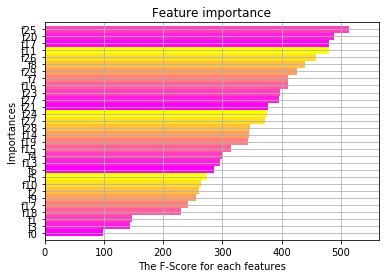

In [24]:
#Significance testing
# Bar plot the feature importances

colors = plt.cm.spring(np.linspace(0, 1, 9))
xgb.plot_importance(model_list[14], height = 1, color = colors, grid = True, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (22, 22)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

# Prediction horizon

In [14]:
df3=df[['time_stamp','Stage1.Output.Measurement0.U.Actual']]
df3.reset_index(drop=True,inplace=True)
df3.columns = ['ds','y']

df3

,ds,y
0,2019-03-06 10:52:33,12.72
1,2019-03-06 10:52:34,12.34
2,2019-03-06 10:52:35,12.34
3,2019-03-06 10:52:36,12.34
4,2019-03-06 10:52:37,12.29
...,...,...
14083,2019-03-06 14:47:16,12.61
14084,2019-03-06 14:47:17,12.61
14085,2019-03-06 14:47:18,12.61
14086,2019-03-06 14:47:19,12.58


In [17]:

from holidays import WEEKEND, HolidayBase
from dateutil.easter import easter
from dateutil.relativedelta import relativedelta as rd

In [18]:
import fbprophet

from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


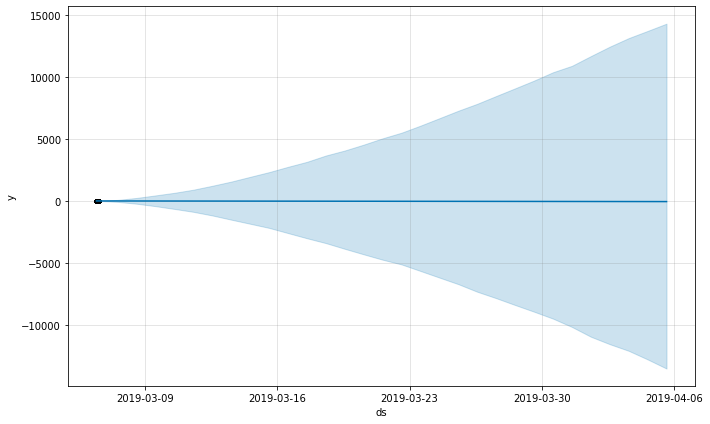

In [19]:

m = fbprophet.Prophet(changepoint_prior_scale=0.01)
m.fit(df3[1:11000])
future = m.make_future_dataframe(periods=30,freq='D')
forecast = m.predict(future)
fig = m.plot(forecast)

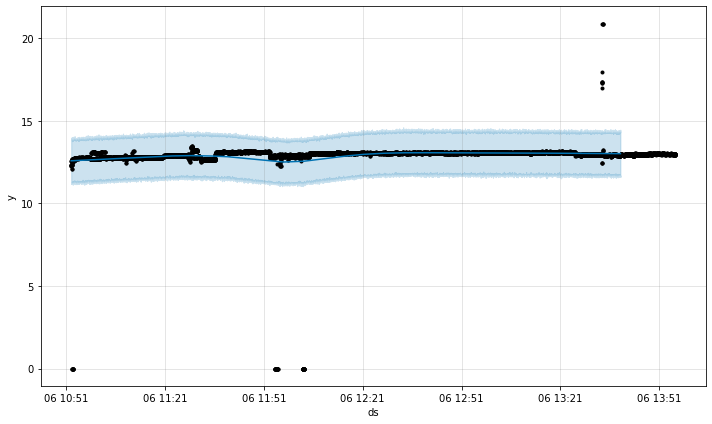

In [29]:
# Predicting the Y
fig = m.plot(forecast[1:10000],)

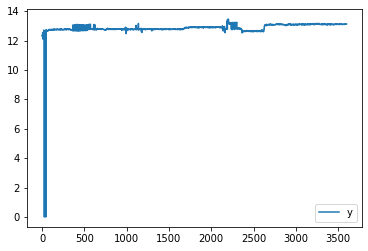

In [21]:
df3[1:3600].plot()

In [28]:
#Scoring Predictions
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='2 hours', period='2 hour', horizon = '1 hours')
df_cv

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-03-06 12:55:51 and 2019-03-06 12:55:51


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-03-06 12:55:52,13.191703,11.718444,14.795132,13.01,2019-03-06 12:55:51
1,2019-03-06 12:55:53,13.191848,11.585496,14.730299,13.01,2019-03-06 12:55:51
2,2019-03-06 12:55:54,13.191993,11.687743,14.712970,13.01,2019-03-06 12:55:51
3,2019-03-06 12:55:55,13.192138,11.543295,14.820192,13.01,2019-03-06 12:55:51
4,2019-03-06 12:55:56,13.192283,11.685076,14.776596,13.07,2019-03-06 12:55:51
...,...,...,...,...,...,...
3593,2019-03-06 13:55:47,13.712461,12.033488,15.301958,12.95,2019-03-06 12:55:51
3594,2019-03-06 13:55:48,13.712606,12.120471,15.471588,12.95,2019-03-06 12:55:51
3595,2019-03-06 13:55:49,13.712751,12.114507,15.381655,12.97,2019-03-06 12:55:51
3596,2019-03-06 13:55:50,13.712896,12.095149,15.450470,12.97,2019-03-06 12:55:51


In [30]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,00:05:59,0.025868,0.160834,0.159244,0.012197,1.0
1,00:06:00,0.025870,0.160841,0.159249,0.012197,1.0
2,00:06:01,0.025852,0.160787,0.159199,0.012193,1.0
3,00:06:02,0.025835,0.160733,0.159149,0.012189,1.0
4,00:06:03,0.025818,0.160679,0.159099,0.012185,1.0
